The data for this project is taken from Kaggle [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) dataset. It consists of Social Security Administration baby naming data from 1880 to 2014. Note that only names with at least 5 babies born in the same year (/ state) are included in this dataset for privacy.

### Preparing The Data

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
font_size = 16

In [171]:
df = pd.read_csv('NationalNames.csv')
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


### Births Per Year

Note: This plot is not a completely accurate representation of the number of births in the US since our data only accounts for names where at least 5 babies were given that name. This chart is to just get a basic understanding of the number of births.

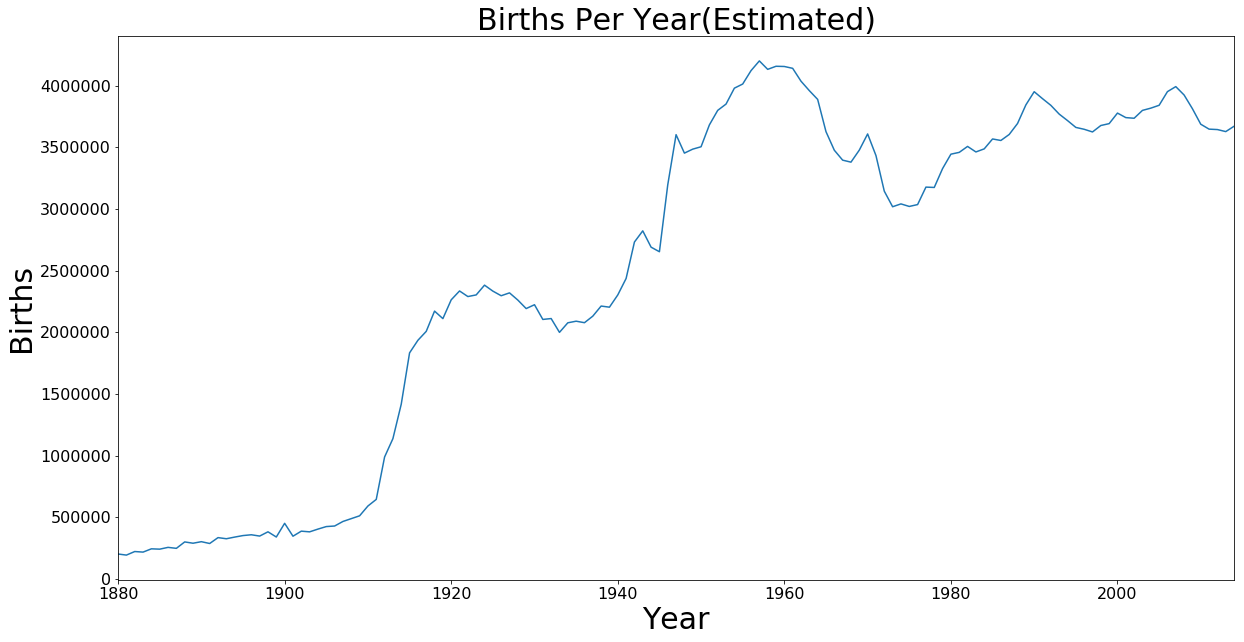

In [172]:
total_per_year = df.groupby('Year').sum()
axis = total_per_year['Count'].plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Births Per Year(Estimated)', fontsize=30)

### Births Per Year By Gender

Note: This plot is not a completely accurate representation of the number of births in the US since our data only accounts for names where at least 5 babies were given that name. This chart is to just get a basic understanding of the number of births and differences by gender.

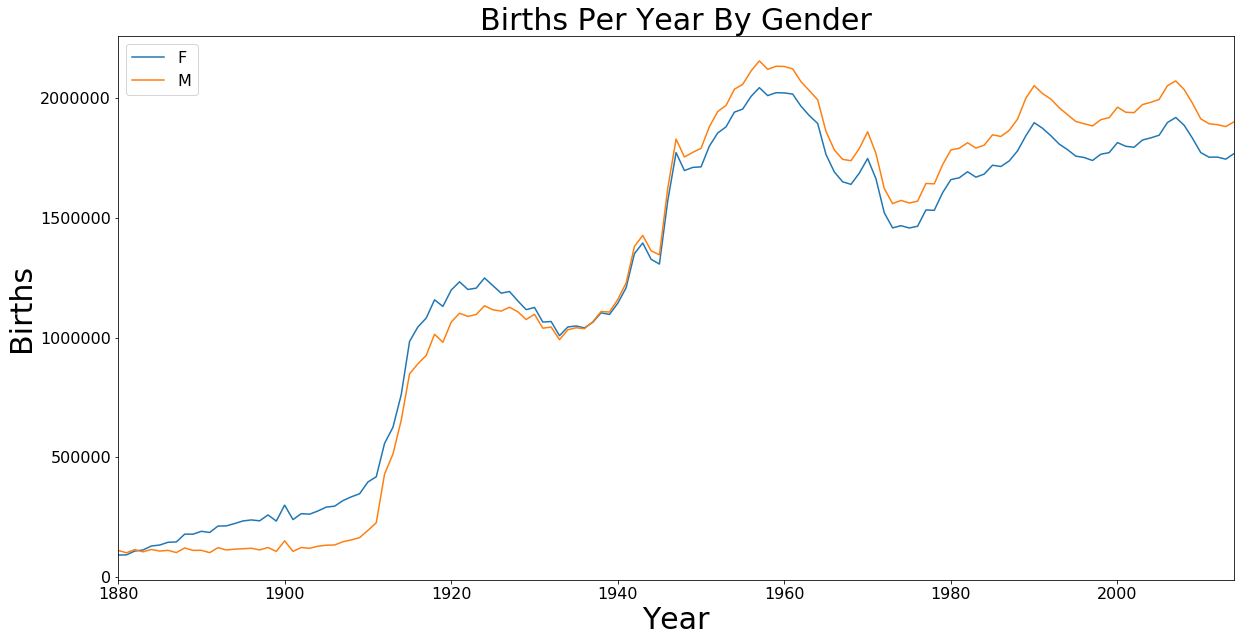

In [173]:
gender = df.groupby(['Year', 'Gender']).sum()
axis = gender['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Births Per Year By Gender', fontsize=30)
axis.legend(fontsize=font_size)

### Proportion of Male to Female Births Per Year

I was curious to see the difference in numbers between male and female births. I expected to be near 50/50 but this was not the case. This sparked some interesting questions of "Why are there more males born in the last 70 years?" and "Why the flip around the 1940s?" Perhaps this will be a future exploration.

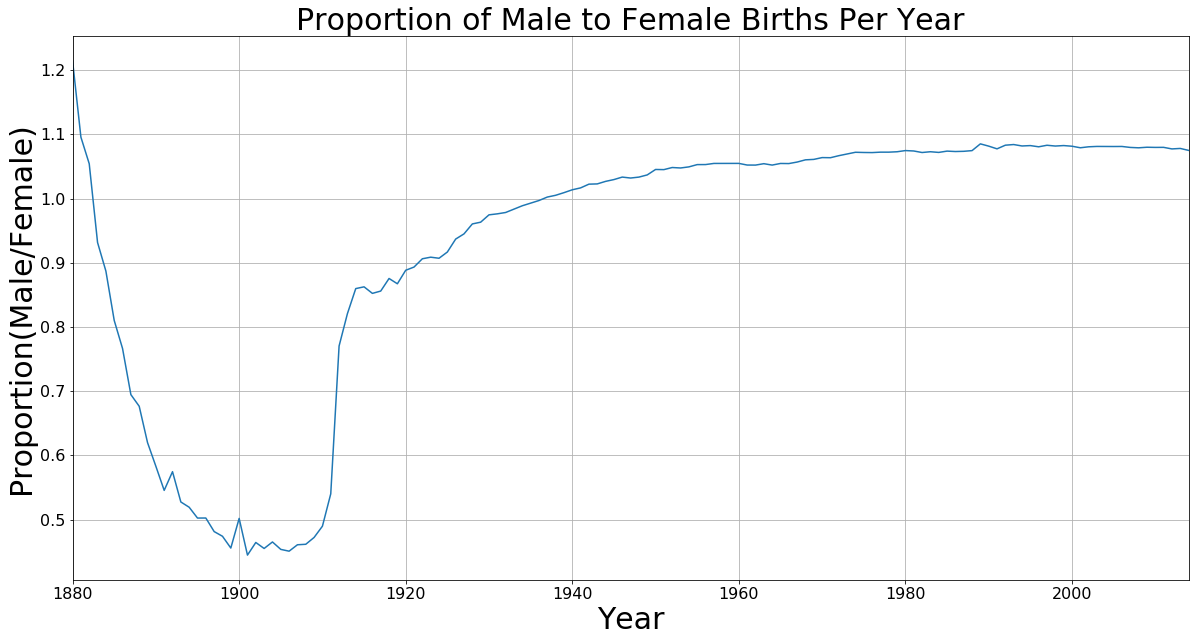

In [174]:
ratio = df.groupby(['Year', 'Gender']).sum()
ratio = ratio.unstack()
ratio['ratio'] = ratio['Count'].apply(lambda row: row['M'] / row['F'], axis=1)
axis = ratio['ratio'].plot.line(figsize=(20,10), grid=True, fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Proportion(Male/Female)', fontsize=30)
axis.set_title('Proportion of Male to Female Births Per Year', fontsize=30)

### Top 10 Names All Time

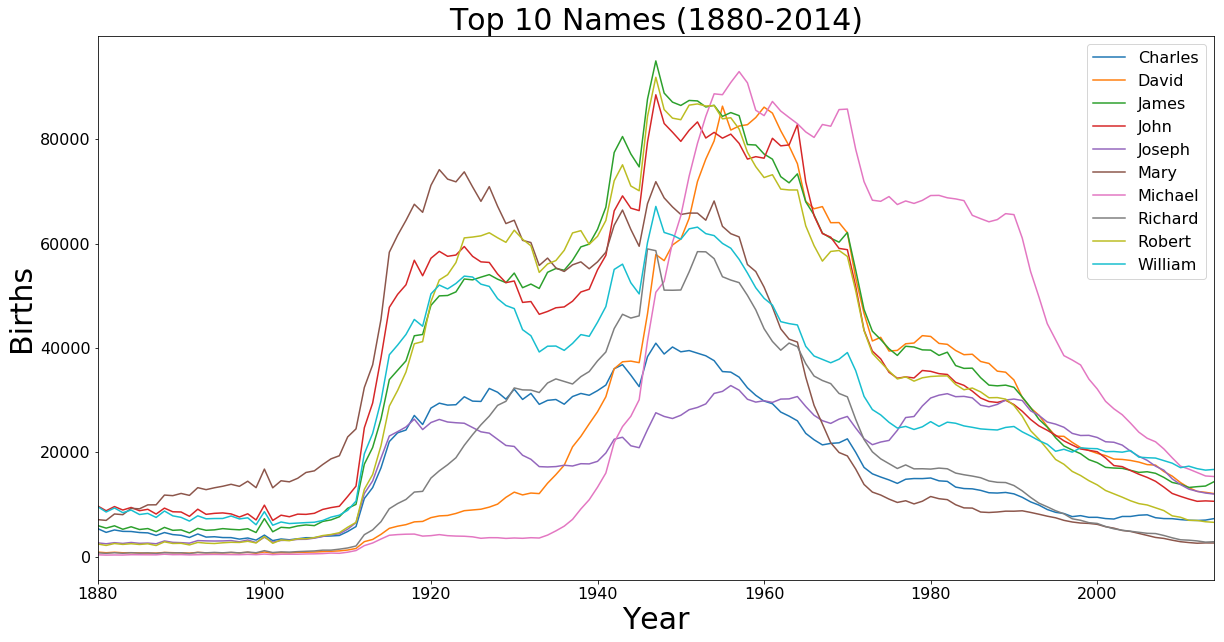

In [175]:
top_names = df.groupby('Name').sum()
top_names = top_names['Count'].sort_values(ascending=False)[:10]
top_10 = []
for i in top_names.iteritems():
    top_10.append(i[0])

top_names = df[df['Name'].isin(top_10)].groupby(['Year', 'Name']).sum()
axis = top_names['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Top 10 Names (1880-2014)', fontsize=30)
axis.legend(fontsize=font_size)

### Top 10 Female Names All Time

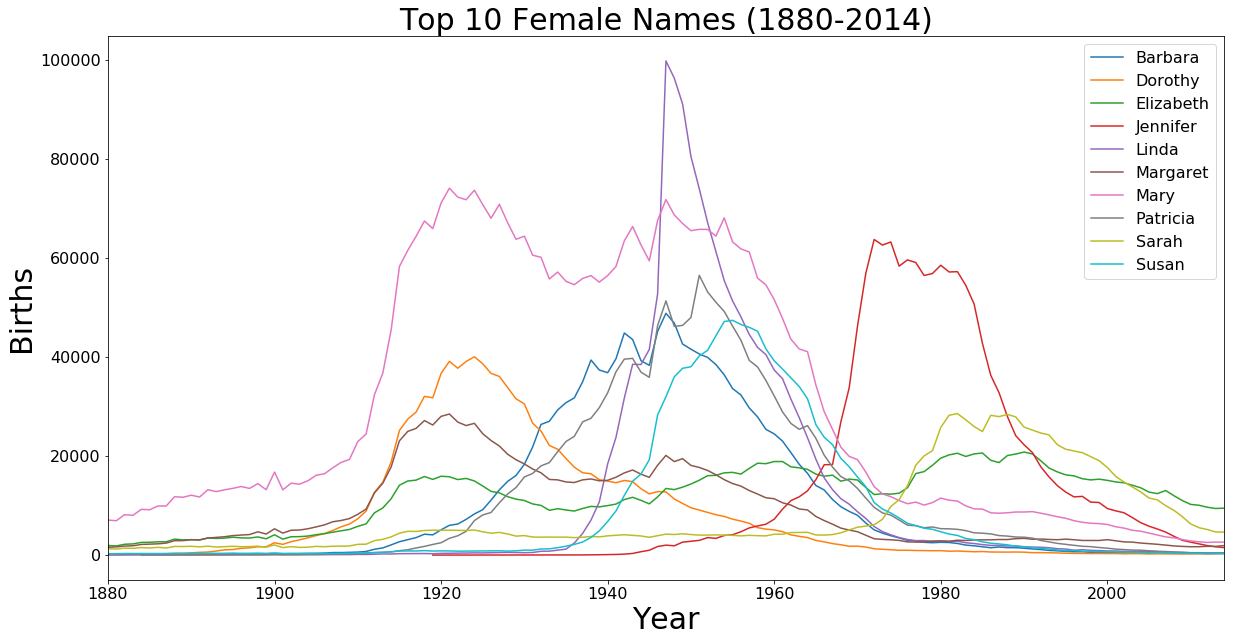

In [176]:
top_names = df[df['Gender'] == 'F'].groupby('Name').sum()
top_names = top_names['Count'].sort_values(ascending=False)[:10]
top_10 = []
for i in top_names.iteritems():
    top_10.append(i[0])

top_names = df[df['Name'].isin(top_10)].groupby(['Year', 'Name']).sum()
axis = top_names['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Top 10 Female Names (1880-2014)', fontsize=30)
axis.legend(fontsize=font_size)

### Top 10 Male Names All Time

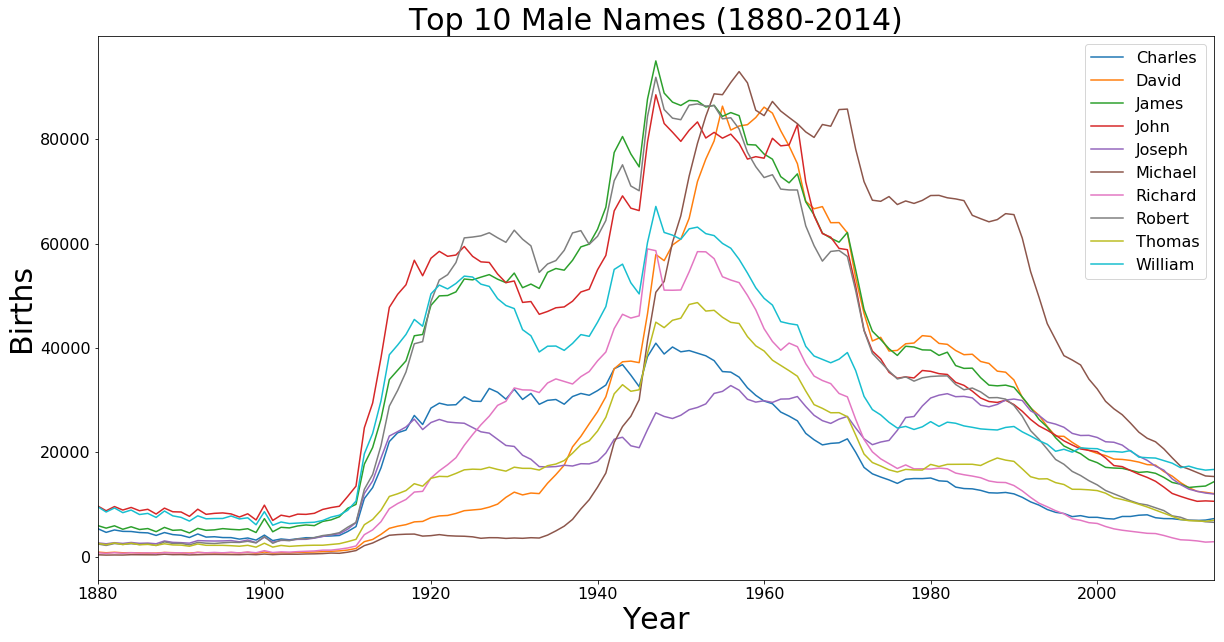

In [177]:
top_names = df[df['Gender'] == 'M'].groupby('Name').sum()
top_names = top_names['Count'].sort_values(ascending=False)[:10]
top_10 = []
for i in top_names.iteritems():
    top_10.append(i[0])

top_names = df[df['Name'].isin(top_10)].groupby(['Year', 'Name']).sum()
axis = top_names['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Top 10 Male Names (1880-2014)', fontsize=30)
axis.legend(fontsize=font_size)

### Diversity In Names
Upon looking at the top 10 names I noticed how they dropped off as they approached today. This was interesting considering that births per year have trended up consistently. This plot looks at the total number of names used each year.

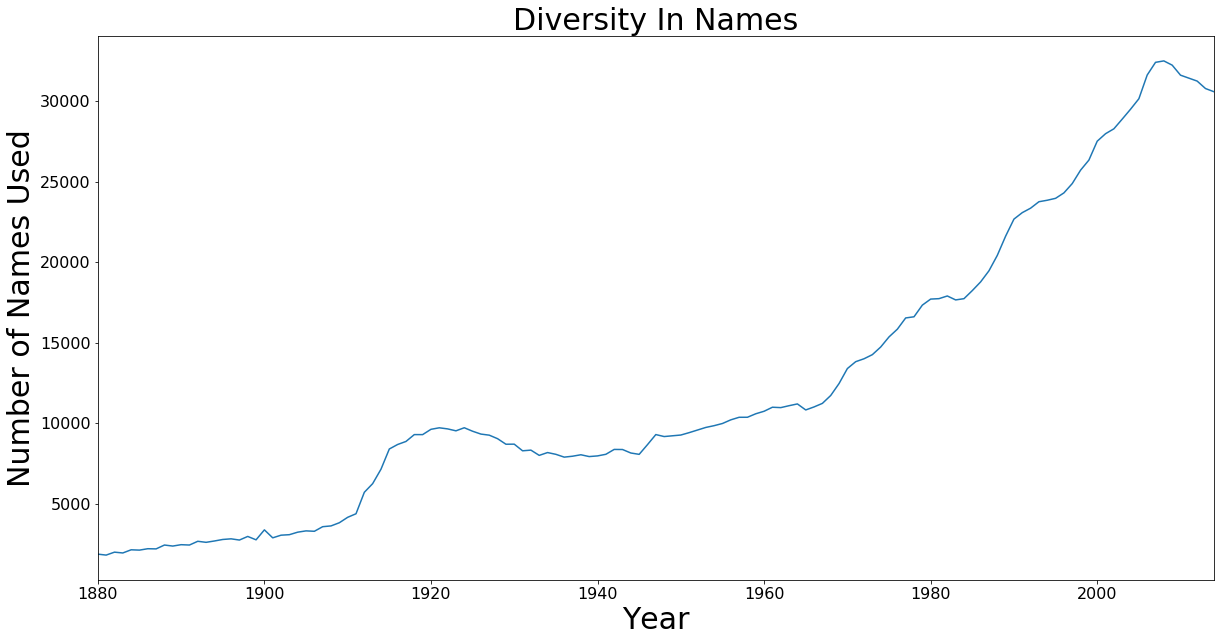

In [178]:
import math
def f(x):
    if not math.isnan(x):
        return 1

diversity = df.groupby(['Name', 'Year']).sum()
diversity = diversity.unstack().applymap(f)
diversity = diversity.sum(axis=0)
axis = diversity['Count'].plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Number of Names Used', fontsize=30)
axis.set_title('Diversity In Names', fontsize=30)

### Most Consistent Names

After seeing the variety of names great increase I was curious if there were any names that were consistently used. This plot looks at the 10 names with the lowest standard deviation over the full time range.

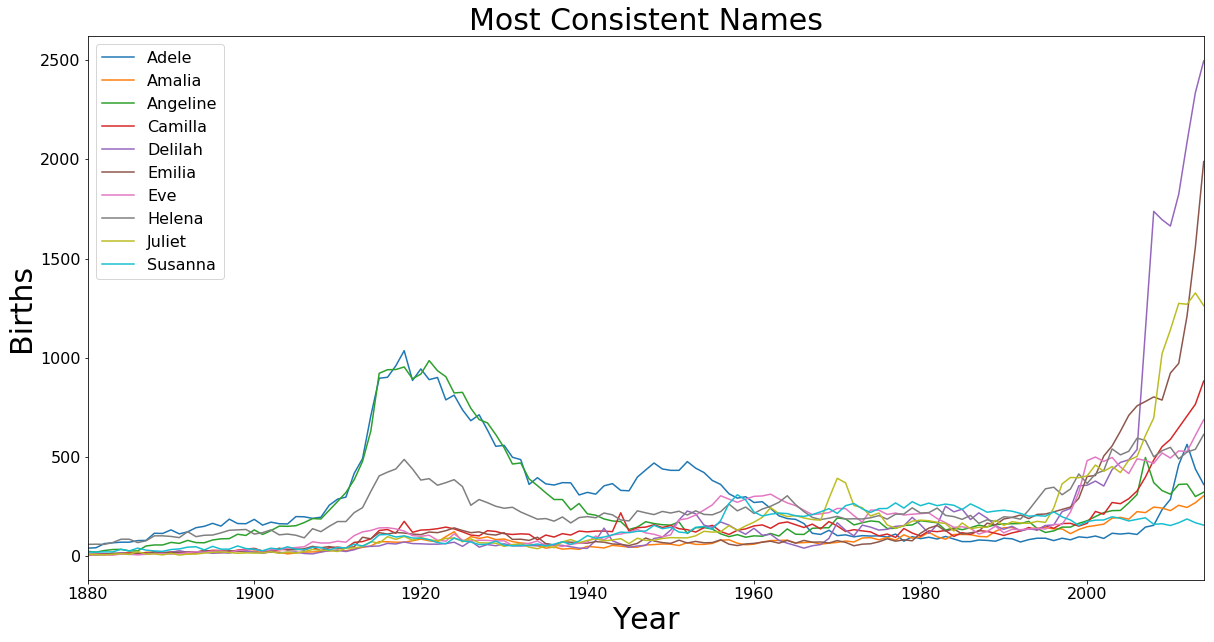

In [179]:
consistent = df.groupby(['Name', 'Year']).sum()
consistent = consistent.unstack().std(axis=1, skipna=False).sort_values().dropna()[:10]

top_10 = list(consistent.index.values)

con_names = df[df['Name'].isin(top_10)].groupby(['Year', 'Name']).sum()
axis = con_names['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Most Consistent Names', fontsize=30)
axis.legend(fontsize=font_size)

### Least Consistent Names

This plot looks at the 10 names with the greatest standard deviation over the full time range.

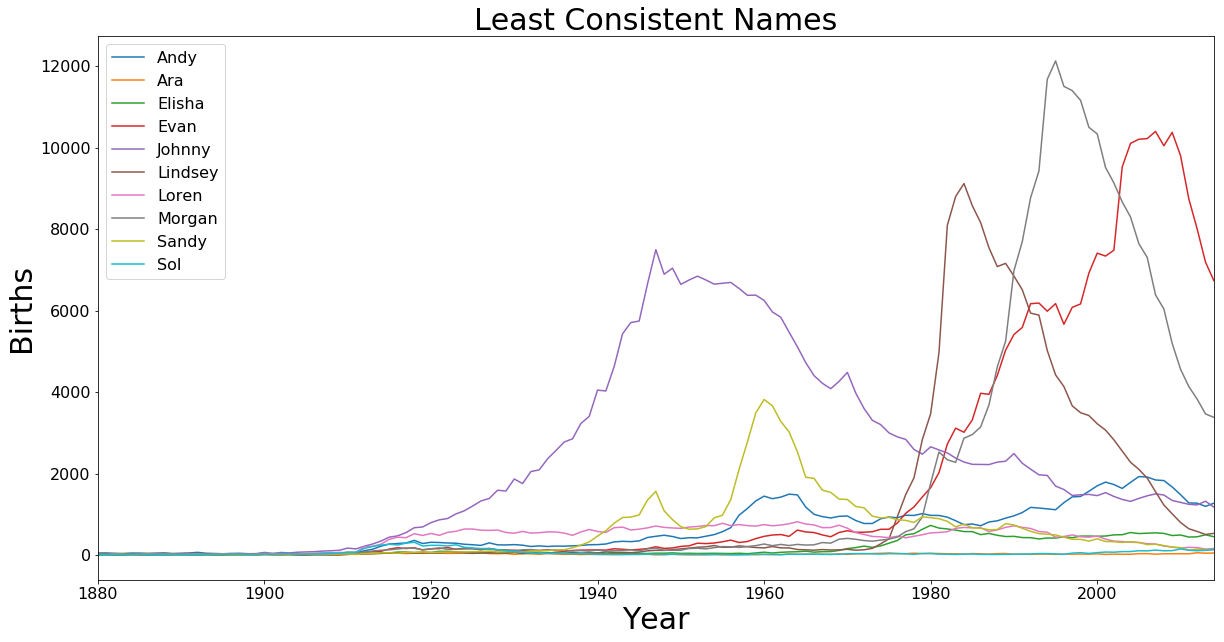

In [180]:
consistent = df.groupby(['Name', 'Year']).sum()
consistent = consistent.unstack().std(axis=1, skipna=False).sort_values().dropna()[-10:]

top_10 = list(consistent.index.values)

con_names = df[df['Name'].isin(top_10)].groupby(['Year', 'Name']).sum()
axis = con_names['Count'].unstack().plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Least Consistent Names', fontsize=30)
axis.legend(fontsize=font_size)

### All The Michaels

Just for fun what is the history of my name.

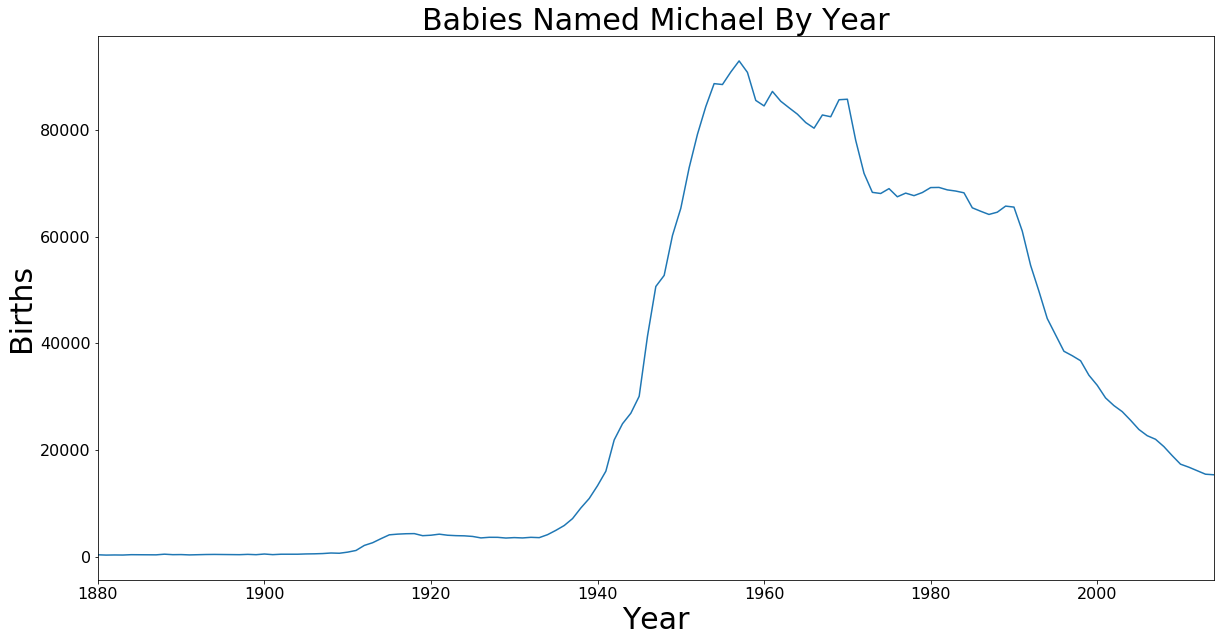

In [181]:
michael = df[df['Name'] == 'Michael'].groupby('Year').sum()
axis = michael['Count'].plot.line(figsize=(20,10), fontsize=font_size)
axis.set_xlabel('Year', fontsize=30)
axis.set_ylabel('Births', fontsize=30)
axis.set_title('Babies Named Michael By Year', fontsize=30)

---

The Jupyter Notebook for this work can be found on [GitHub](https://github.com/mholtzscher/baby-names-analysis/blob/master/national.ipynb).